In [2]:
# Import Libaries

In [3]:
#Base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set()

# Libraries for Preprocessing
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
import missingno as msno
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
#from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE


# Libraries for Machine Learning Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Scikit-learn version of algorithms implemented in this study 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Libraries  for Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, auc

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Others
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
import pickle

# Ensembling different Algorithms
from sklearn.ensemble import StackingClassifier

In [3]:

# load dataset

In [4]:
# Add colors for vitualization
colors = ['royalblue','red', 'deepink','maroon','mediumorchild','tan','forestgreen', 'olive','goldenrod','lightcyan','navy']

vactorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [4]:
# Method to read file, process and divide dataset into X (Features) and y (label)

def read_process_divide(file):
    data = pd.read_csv(file)
    
    # drop first column
    data.drop(columns=data.columns[0], axis=1, inplace=True)
    
    # divide features and target
    X = data.iloc[:,: -1]
    y = data.iloc[:, -1]

    return data, X , y

In [5]:
diabetes_data, X, y = read_process_divide("diabetes_data_jos_urban_2012_no_missing_values_Updated_2.csv")

In [7]:
diabetes_data.shape

(746, 14)

In [8]:
# Method to read file, process and split dataset into train and test

def read_process_split(file):
    data = pd.read_csv(file)
    
    # drop first column
    data.drop(columns=data.columns[0], axis=1, inplace=True)
    
    # divide features and target
    X = data.iloc[:,: -1]
    y = data.iloc[:, -1]
    
    # convert to numpy
    #X = x.to_numpy()
    #y = y.to_numpy()
    
    # convert to numpy
    X = X.values
    y = y.values
    
    #create train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)
    
    return data, X_train, X_test, y_train, y_test;

In [9]:
diabetes_data, X_train, X_test, y_train, y_test = read_process_split("diabetes_data_jos_urban_2012_no_missing_values_Updated_2.csv")

In [10]:
# Visualie the data
#plt.gca().set_title("Data")
#plt.scatter(X[:, 0], X[:, 1], c=vectorizer(y))

In [10]:
np.bincount(y)

array([653,  93])

In [11]:
np.bincount(y_train)

array([457,  65])

In [12]:
# Feature Selection

<AxesSubplot:>

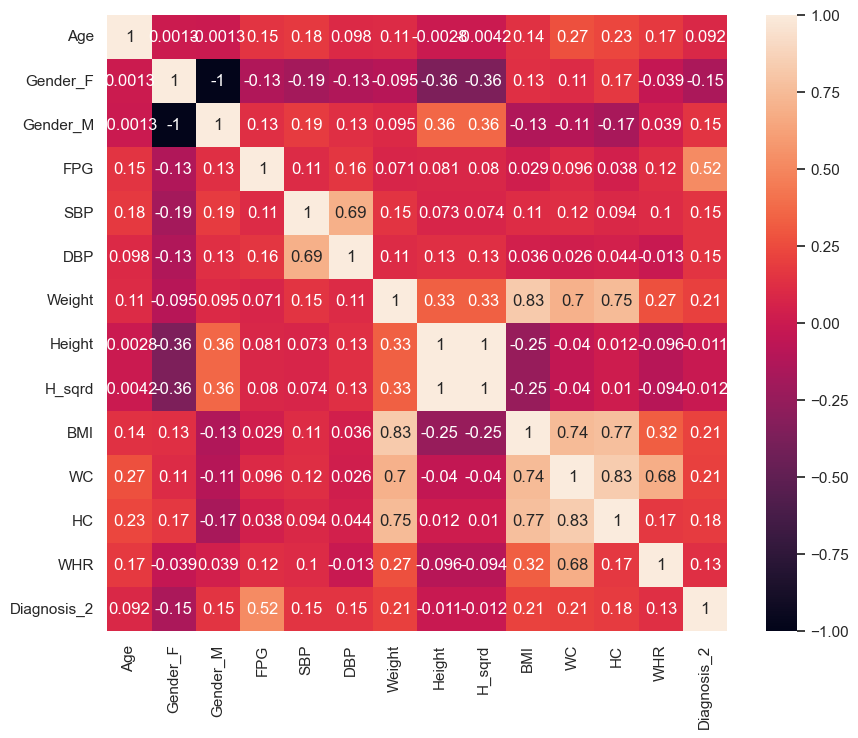

In [13]:
# Correlation

plt.figure(figsize=(10,8))
sns.heatmap(diabetes_data.corr(), annot= True)

<AxesSubplot:>

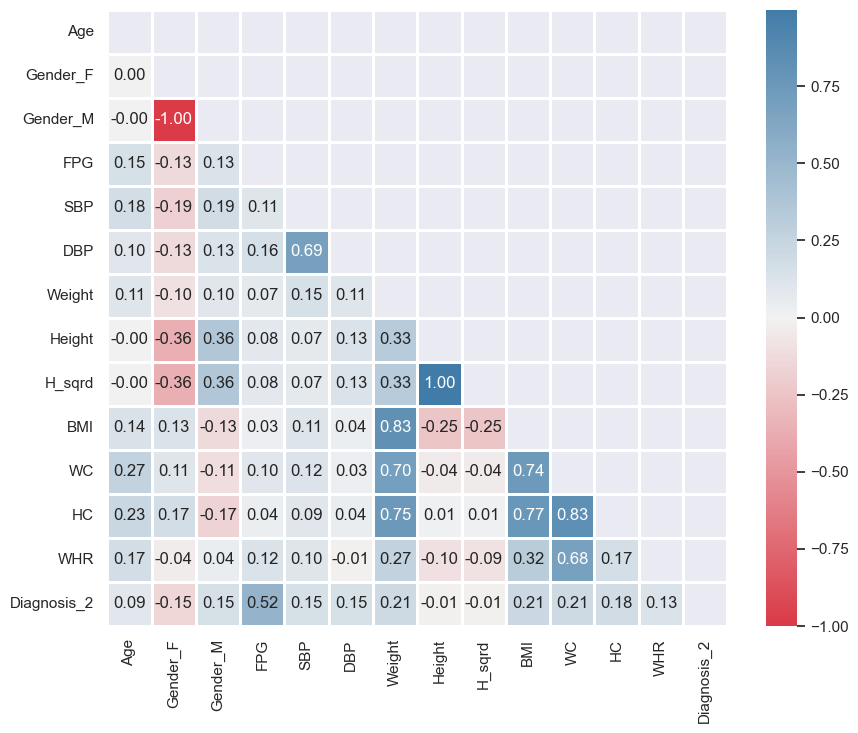

In [14]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
mask = np.triu(np.ones_like(diabetes_data.corr(), dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_data.corr(), center=0, mask=mask, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [15]:
bottom_features = diabetes_data.corr()["Diagnosis_2"].sort_values().head(3).index

In [16]:
bottom_features

Index(['Gender_F', 'H_sqrd', 'Height'], dtype='object')

In [17]:
# Recursive Feature Elimination

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [19]:
rfe= RFE(estimator=LogisticRegression(), n_features_to_select=9, verbose=1)
rfe.fit(X_train_scaled, y_train)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


RFE(estimator=LogisticRegression(), n_features_to_select=9, verbose=1)

In [20]:
X.columns[rfe.support_]

Index(['Age', 'Gender_F', 'Gender_M', 'FPG', 'SBP', 'Weight', 'Height',
       'H_sqrd', 'HC'],
      dtype='object')

In [21]:
print(dict(zip(X.columns, rfe.ranking_)))

{'Age': 1, 'Gender_F': 1, 'Gender_M': 1, 'FPG': 1, 'SBP': 1, 'DBP': 5, 'Weight': 1, 'Height': 1, 'H_sqrd': 1, 'BMI': 4, 'WC': 2, 'HC': 1, 'WHR': 3}


In [22]:
print(accuracy_score(y_test, rfe.predict(X_test_scaled)))

0.9151785714285714


In [23]:
rfe= RFE(estimator=RandomForestClassifier(), n_features_to_select=10, verbose=1)
rfe.fit(X_train_scaled, y_train)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=10, verbose=1)

In [24]:
X.columns[rfe.support_]

Index(['Age', 'FPG', 'SBP', 'DBP', 'Weight', 'Height', 'BMI', 'WC', 'HC',
       'WHR'],
      dtype='object')

In [25]:
print(dict(zip(X.columns, rfe.ranking_)))

{'Age': 1, 'Gender_F': 4, 'Gender_M': 3, 'FPG': 1, 'SBP': 1, 'DBP': 1, 'Weight': 1, 'Height': 1, 'H_sqrd': 2, 'BMI': 1, 'WC': 1, 'HC': 1, 'WHR': 1}


In [26]:
print(accuracy_score(y_test, rfe.predict(X_test_scaled)))

0.9821428571428571


In [27]:
# Principal Coponent Analysis

In [28]:
pca = PCA(n_components=10)
X_train_pca =pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [29]:
X_test_scaled.shape

(224, 13)

In [30]:
X_train_pca.shape

(522, 10)

In [31]:
# Accuracy results  of reduce dataset with PCA

In [33]:
models = {'naive_bayes': GaussianNB(),
          'support_vector_machine': LinearSVC(),
          'decision_tree': DecisionTreeClassifier(),
          'random_forest': RandomForestClassifier(),
          'logistic_regression': LogisticRegression()}

In [34]:
for model in models.values():
    model.fit(X_train_pca, y_train)
    
    print(model)
    print("---------------------------------------------------------------------")
    y_pred = model.predict(X_test_pca)
    
    print("Evaluation Metrics")
    print("---------------------------------------------------------------------")
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
    print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred)* 100)          
    print("Precision: ", precision_score(y_test, y_pred) * 100)
    print("Recall or Sensitivity:", recall_score(y_test, y_pred)* 100)
    print("MCC: ", matthews_corrcoef(y_test, y_pred)* 100)
    
    print("---------------------------------------------------------------------")
    print(" ")

GaussianNB()
---------------------------------------------------------------------
Evaluation Metrics
---------------------------------------------------------------------
[[188   8]
 [ 23   5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       196
           1       0.38      0.18      0.24        28

    accuracy                           0.86       224
   macro avg       0.64      0.57      0.58       224
weighted avg       0.83      0.86      0.84       224

Accuracy: 86.16071428571429
ROC_AUC_SCORE:  56.88775510204081
Precision:  38.46153846153847
Recall or Sensitivity: 17.857142857142858
MCC:  19.485064168210727
---------------------------------------------------------------------
 
LinearSVC()
---------------------------------------------------------------------
Evaluation Metrics
---------------------------------------------------------------------
[[194   2]
 [ 18  10]]
              precision    recall  f1-score   support

In [37]:
# Result of original train test split dataset

In [36]:
for model in models.values():
    model.fit(X_train, y_train)
    
    print(model)
    print("---------------------------------------------------------------------")
    y_pred = model.predict(X_test)
    
    print("Evaluation Metrics")
    print("---------------------------------------------------------------------")
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
    print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred)* 100)          
    print("Precision: ", precision_score(y_test, y_pred) * 100)
    print("Recall or Sensitivity:", recall_score(y_test, y_pred)* 100)
    print("MCC: ", matthews_corrcoef(y_test, y_pred)* 100)
    
    print("---------------------------------------------------------------------")
    print(" ")

GaussianNB()
---------------------------------------------------------------------
Evaluation Metrics
---------------------------------------------------------------------
[[192   4]
 [  9  19]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       196
           1       0.83      0.68      0.75        28

    accuracy                           0.94       224
   macro avg       0.89      0.83      0.86       224
weighted avg       0.94      0.94      0.94       224

Accuracy: 94.19642857142857
ROC_AUC_SCORE:  82.90816326530613
Precision:  82.6086956521739
Recall or Sensitivity: 67.85714285714286
MCC:  71.70983836107422
---------------------------------------------------------------------
 
LinearSVC()
---------------------------------------------------------------------
Evaluation Metrics
---------------------------------------------------------------------
[[193   3]
 [ 14  14]]
              precision    recall  f1-score   support

 

In [38]:
# resampling or Balancing the Dataset

In [39]:
smote = SMOTE(random_state=42)
X_resample, y_resample =smote.fit_resample(X_train, y_train)

In [40]:
np.bincount(y_resample)

array([457, 457])

In [41]:
# train with the new resampled dataset

In [42]:
for model in models.values():
    model.fit(X_resample, y_resample)
    
    print(model)
    print("---------------------------------------------------------------------")
    y_pred = model.predict(X_test)
    
    print("Evaluation Metrics")
    print("---------------------------------------------------------------------")
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
    print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred)* 100)          
    print("Precision: ", precision_score(y_test, y_pred) * 100)
    print("Recall or Sensitivity:", recall_score(y_test, y_pred)* 100)
    print("MCC: ", matthews_corrcoef(y_test, y_pred)* 100)
    
    print("---------------------------------------------------------------------")
    print(" ")

GaussianNB()
---------------------------------------------------------------------
Evaluation Metrics
---------------------------------------------------------------------
[[167  29]
 [  6  22]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       196
           1       0.43      0.79      0.56        28

    accuracy                           0.84       224
   macro avg       0.70      0.82      0.73       224
weighted avg       0.90      0.84      0.86       224

Accuracy: 84.375
ROC_AUC_SCORE:  81.8877551020408
Precision:  43.13725490196079
Recall or Sensitivity: 78.57142857142857
MCC:  50.298247480244086
---------------------------------------------------------------------
 
LinearSVC()
---------------------------------------------------------------------
Evaluation Metrics
---------------------------------------------------------------------
[[194   2]
 [ 16  12]]
              precision    recall  f1-score   support

           

### Cross Validation with balanced dataset

In [17]:
X_balanced, y_balanced = smote.fit_resample(X, y)

In [19]:
np.bincount(y_balanced)

array([653, 653])

In [18]:
for model in models.values():
    # Create a KFold object
    kf = KFold(n_splits=10, shuffle= True, random_state = 42)
    
    # Compute 6-fold cross-validation scores
    cv_scores = cross_val_score(model, X_balanced, y_balanced, cv=kf)
    
    # Print scores
    print(model)
    print(cv_scores)
    
    # print mean of cv_scores
    print("Accuracy: ", np.mean(cv_scores))
    print("----------------------------------------------")
    print("----------------------------------------------")

GaussianNB()
[0.83969466 0.83969466 0.81679389 0.82442748 0.80152672 0.81679389
 0.8        0.80769231 0.83076923 0.83076923]
Accuracy:  0.8208162066940693
----------------------------------------------
----------------------------------------------
LinearSVC()
[0.75572519 0.77099237 0.91603053 0.82442748 0.73282443 0.72519084
 0.66153846 0.89230769 0.75384615 0.92307692]
Accuracy:  0.7955960070463888
----------------------------------------------
----------------------------------------------
DecisionTreeClassifier()
[1.         0.99236641 0.98473282 0.98473282 0.98473282 1.
 1.         1.         0.99230769 1.        ]
Accuracy:  0.9938872577803876
----------------------------------------------
----------------------------------------------
RandomForestClassifier()
[1.         1.         0.98473282 0.99236641 0.98473282 1.
 1.         1.         0.99230769 1.        ]
Accuracy:  0.9954139753376395
----------------------------------------------
----------------------------------------

In [20]:
for model in models.values():
    # Create a KFold object
    kf = KFold(n_splits=10, shuffle= True, random_state = 42)
    
    # Compute 6-fold cross-validation scores
    cv_scores = cross_val_score(model, X_balanced, y_balanced, cv=kf, scoring="roc_auc")
    
    # Print scores
    print(model)
    print(cv_scores)
    
    # print mean of cv_scores
    print("ROC_AUC: ", np.mean(cv_scores))
    print("----------------------------------------------")
    print("----------------------------------------------")

GaussianNB()
[0.91351981 0.90764925 0.92413466 0.88923004 0.85982726 0.90792541
 0.89750958 0.8908046  0.92432882 0.92253021]
ROC_AUC:  0.9037459644459815
----------------------------------------------
----------------------------------------------
LinearSVC()
[0.97599068 0.92397388 0.96420104 0.96516297 0.93685808 0.97435897
 0.98371648 0.98754789 0.98170587 0.97417674]
ROC_AUC:  0.9667692588685153
----------------------------------------------
----------------------------------------------
DecisionTreeClassifier()
[1.         1.         0.98648649 0.99126122 0.98529412 1.
 1.         1.         0.99275362 1.        ]
ROC_AUC:  0.9955795446027667
----------------------------------------------
----------------------------------------------
RandomForestClassifier()
[1.         1.         0.99608819 0.99515824 0.99463119 1.
 1.         1.         1.         1.        ]
ROC_AUC:  0.998587762206068
----------------------------------------------
---------------------------------------------

In [21]:
for model in models.values():
    # Create a KFold object
    kf = KFold(n_splits=10, shuffle= True, random_state = 42)
    
    # Compute 6-fold cross-validation scores
    cv_scores = cross_val_score(model, X_balanced, y_balanced, cv=kf, scoring="precision")
    
    # Print scores
    print(model)
    print(cv_scores)
    
    # print mean of cv_scores
    print("Precision: ", np.mean(cv_scores))
    print("----------------------------------------------")
    print("----------------------------------------------")

GaussianNB()
[0.80555556 0.86440678 0.78947368 0.86764706 0.78461538 0.80597015
 0.75806452 0.86153846 0.84057971 0.84615385]
Precision:  0.8224005146086013
----------------------------------------------
----------------------------------------------
LinearSVC()
[0.95384615 1.         0.9122807  0.88888889 0.69230769 1.
 0.81690141 0.98245614 0.97058824 0.89333333]
Precision:  0.9110602554226153
----------------------------------------------
----------------------------------------------
DecisionTreeClassifier()
[1.         1.         0.96610169 0.98630137 0.96923077 1.
 1.         1.         1.         1.        ]
Precision:  0.9921633834009038
----------------------------------------------
----------------------------------------------
RandomForestClassifier()
[1.         1.         0.96610169 0.98648649 0.96923077 1.
 1.         1.         1.         1.        ]
Precision:  0.9921818950632509
----------------------------------------------
--------------------------------------------

In [23]:
for model in models.values():
    # Create a KFold object
    kf = KFold(n_splits=10, shuffle= True, random_state = 42)
    
    # Compute 6-fold cross-validation scores
    cv_scores = cross_val_score(model, X_balanced, y_balanced, cv=kf, scoring="recall")
    
    # Print scores
    print(model)
    print(cv_scores)
    
    # print mean of cv_scores
    print("Sensitivity: ", np.mean(cv_scores))
    print("----------------------------------------------")
    print("----------------------------------------------")

GaussianNB()
[0.89230769 0.796875   0.78947368 0.80821918 0.80952381 0.83076923
 0.81034483 0.77777778 0.84057971 0.82089552]
Sensitivity:  0.8176766432790423
----------------------------------------------
----------------------------------------------
LinearSVC()
[1.         1.         1.         0.4109589  1.         1.
 0.22413793 0.66666667 1.         1.        ]
Sensitivity:  0.8301763501810738
----------------------------------------------
----------------------------------------------
DecisionTreeClassifier()
[1.         1.         1.         1.         1.         1.
 1.         1.         0.98550725 1.        ]
Sensitivity:  0.9985507246376812
----------------------------------------------
----------------------------------------------
RandomForestClassifier()
[1.         1.         1.         1.         1.         1.
 1.         1.         0.98550725 1.        ]
Sensitivity:  0.9985507246376812
----------------------------------------------
------------------------------------

### Class Balancing, Feature Selection and Scaling of Dataset

In [43]:
smote = SMOTE(random_state=42)
X_resample, y_resample =smote.fit_resample(X_train, y_train)
#X_test_resample, y_test_resample = smote.resample(X_test, y_test)

In [44]:
# Scaling
scaler = StandardScaler()
X_train_resample_scaled = scaler.fit_transform(X_resample)
X_test_scaled  = scaler.transform(X_test)

In [45]:
# PCA
pca = PCA(n_components=10)
X_train_resample_scaled_pca = pca.fit_transform(X_train_resample_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [46]:
# Results

In [47]:
for model in models.values():
    model.fit(X_train_resample_scaled_pca, y_resample)
    
    print(model)
    print("---------------------------------------------------------------------")
    y_pred = model.predict(X_test_scaled_pca)
    
    print("Evaluation Metrics")
    print("---------------------------------------------------------------------")
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
    print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred)* 100)          
    print("Precision: ", precision_score(y_test, y_pred) * 100)
    print("Recall or Sensitivity:", recall_score(y_test, y_pred)* 100)
    print("MCC: ", matthews_corrcoef(y_test, y_pred)* 100)
    
    print("---------------------------------------------------------------------")
    print(" ")

GaussianNB()
---------------------------------------------------------------------
Evaluation Metrics
---------------------------------------------------------------------
[[165  31]
 [ 10  18]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       196
           1       0.37      0.64      0.47        28

    accuracy                           0.82       224
   macro avg       0.66      0.74      0.68       224
weighted avg       0.87      0.82      0.84       224

Accuracy: 81.69642857142857
ROC_AUC_SCORE:  74.23469387755102
Precision:  36.734693877551024
Recall or Sensitivity: 64.28571428571429
MCC:  38.775510204081634
---------------------------------------------------------------------
 
LinearSVC()
---------------------------------------------------------------------
Evaluation Metrics
---------------------------------------------------------------------
[[178  18]
 [  6  22]]
              precision    recall  f1-score   support

### Cross validation with Class Balancing, Scaling and Feature Selection

In [48]:
# Class Balancing
smote = SMOTE(random_state=42)
X_resample, y_resample =smote.fit_resample(X, y)

# Scaling
scaler = StandardScaler()
X_resample_scaled = scaler.fit_transform(X_resample)

# PCA
pca = PCA(n_components=10)
X_resample_scaled_pca = pca.fit_transform(X_resample_scaled)

In [49]:
for model in models.values():
    # Create a KFold object
    kf = KFold(n_splits=10, shuffle= True, random_state = 42)
    
    # Compute 6-fold cross-validation scores
    cv_scores = cross_val_score(model, X_resample_scaled_pca, y_resample, cv=kf)
    
    # Print scores
    print(model)
    print(cv_scores)
    
    # print mean of cv_scores
    print("Accuracy: ", np.mean(cv_scores))
    print("----------------------------------------------")
    print("----------------------------------------------")

GaussianNB()
[0.81679389 0.7480916  0.83969466 0.74045802 0.83206107 0.76335878
 0.86153846 0.73846154 0.87692308 0.79230769]
Accuracy:  0.8009688784497946
----------------------------------------------
----------------------------------------------
LinearSVC()
[0.89312977 0.89312977 0.91603053 0.91603053 0.85496183 0.88549618
 0.93846154 0.86923077 0.93076923 0.90769231]
Accuracy:  0.9004932472108045
----------------------------------------------
----------------------------------------------
DecisionTreeClassifier()
[0.95419847 0.90076336 0.93129771 0.90839695 0.9389313  0.96946565
 0.96153846 0.96153846 0.96923077 0.96153846]
Accuracy:  0.9456899588960658
----------------------------------------------
----------------------------------------------
RandomForestClassifier()
[0.99236641 0.96183206 0.96183206 0.98473282 0.96946565 0.98473282
 0.98461538 0.96923077 0.98461538 0.99230769]
Accuracy:  0.97857310628303
----------------------------------------------
--------------------------

In [50]:
for model in models.values():
    # Create a KFold object
    kf = KFold(n_splits=10, shuffle= True, random_state = 42)
    
    # Compute 6-fold cross-validation scores
    cv_scores = cross_val_score(model, X_resample_scaled_pca, y_resample, cv=kf, scoring="roc_auc")
    
    # Print scores
    print(model)
    print(cv_scores)
    
    # print mean of cv_scores
    print("ROC_AUC: ", np.mean(cv_scores))
    print("----------------------------------------------")
    print("----------------------------------------------")

GaussianNB()
[0.96643357 0.9323694  0.96420104 0.94036372 0.90814659 0.93426573
 0.9427682  0.94659962 0.97552863 0.95356551]
ROC_AUC:  0.9464242012075698
----------------------------------------------
----------------------------------------------
LinearSVC()
[0.96550117 0.97527985 0.96064486 0.9576051  0.91795051 0.95104895
 0.97246169 0.97006705 0.97196484 0.97133381]
ROC_AUC:  0.9613857817816033
----------------------------------------------
----------------------------------------------
DecisionTreeClassifier()
[0.95384615 0.93843284 0.90884305 0.93634861 0.95331466 0.95431235
 0.96312261 0.96719349 0.96020432 0.96955698]
ROC_AUC:  0.9505175056316132
----------------------------------------------
----------------------------------------------
RandomForestClassifier()
[0.99941725 0.99673507 0.98055951 0.99315068 0.99171335 0.99941725
 1.         0.99604885 0.99952483 0.99940772]
ROC_AUC:  0.9955974518888728
----------------------------------------------
----------------------------

In [52]:
for model in models.values():
    # Create a KFold object
    kf = KFold(n_splits=10, shuffle= True, random_state = 42)
    
    # Compute 6-fold cross-validation scores
    cv_scores = cross_val_score(model, X_resample_scaled_pca, y_resample, cv=kf, scoring="precision")
    
    # Print scores
    print(model)
    print(cv_scores)
    
    # print mean of cv_scores
    print("Precision: ", np.mean(cv_scores))
    print("----------------------------------------------")
    print("----------------------------------------------")

GaussianNB()
[0.97674419 1.         0.97368421 0.95348837 0.91836735 0.94736842
 0.97619048 0.95238095 0.96491228 0.97619048]
Precision:  0.9639326722120917
----------------------------------------------
----------------------------------------------
LinearSVC()
[0.89230769 0.91666667 0.91071429 0.94285714 0.80555556 0.87878788
 0.91666667 0.93650794 0.92857143 0.91044776]
Precision:  0.9039083014829284
----------------------------------------------
----------------------------------------------
DecisionTreeClassifier()
[0.93939394 0.92063492 0.88333333 0.94520548 0.95238095 0.94117647
 0.95       0.95890411 0.97101449 0.984375  ]
Precision:  0.94464186981261
----------------------------------------------
----------------------------------------------
RandomForestClassifier()
[1.         0.96825397 0.91935484 0.97333333 0.95384615 0.96969697
 0.98275862 0.97260274 0.98550725 1.        ]
Precision:  0.9725353870632597
----------------------------------------------
----------------------

In [53]:
for model in models.values():
    # Create a KFold object
    kf = KFold(n_splits=10, shuffle= True, random_state = 42)
    
    # Compute 6-fold cross-validation scores
    cv_scores = cross_val_score(model, X_resample_scaled_pca, y_resample, cv=kf, scoring="recall")
    
    # Print scores
    print(model)
    print(cv_scores)
    
    # print mean of cv_scores
    print("Sensitivity: ", np.mean(cv_scores))
    print("----------------------------------------------")
    print("----------------------------------------------")

GaussianNB()
[0.64615385 0.484375   0.64912281 0.56164384 0.71428571 0.55384615
 0.70689655 0.55555556 0.79710145 0.6119403 ]
Sensitivity:  0.6280921211982216
----------------------------------------------
----------------------------------------------
LinearSVC()
[0.89230769 0.859375   0.89473684 0.90410959 0.92063492 0.89230769
 0.94827586 0.83333333 0.94202899 0.91044776]
Sensitivity:  0.899755767850024
----------------------------------------------
----------------------------------------------
DecisionTreeClassifier()
[0.95384615 0.921875   0.94736842 0.94520548 0.9047619  0.98461538
 0.98275862 0.98611111 0.97101449 0.95522388]
Sensitivity:  0.9552780448879533
----------------------------------------------
----------------------------------------------
RandomForestClassifier()
[0.98461538 0.953125   0.98245614 1.         0.98412698 1.
 0.98275862 0.98611111 0.98550725 0.98507463]
Sensitivity:  0.9843775114136497
----------------------------------------------
---------------------

### Stratified Cross Validation with Class Balancing, Scaling and Feature Selection

### Naive Bayes Classifier

In [55]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

#X, y, groups = get_X_y(train)

fold = 0
aucs = []
accs = []
pres = []
rcls = []
mccs = []

for train_idx, val_idx in sk.split(X, y):
    # training set
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    # testing set 
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    # Other preprocessing task
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Scaling
    scaler = StandardScaler()
    X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_val)

    # PCA
    pca = PCA(n_components=10)
    X_train_resampled_scaled_pca = pca.fit_transform(X_train_resampled_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    

    # Fit Model on Train
    clf = GaussianNB()
    clf.fit(X_train_resampled_scaled_pca, y_train_resampled)
    pred = clf.predict(X_test_scaled_pca)
    #pred_prob = clf.predict_proba(X_val)[:, 1]
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 0 ========
Our accuracy on the validation set is 0.8800 and AUC is 0.6439
======= Fold 1 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.6667
======= Fold 2 ========
Our accuracy on the validation set is 0.9733 and AUC is 0.9369
======= Fold 3 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.7423
======= Fold 4 ========
Our accuracy on the validation set is 0.8800 and AUC is 0.6769
======= Fold 5 ========
Our accuracy on the validation set is 0.8933 and AUC is 0.6846
======= Fold 6 ========
Our accuracy on the validation set is 0.8649 and AUC is 0.7795
======= Fold 7 ========
Our accuracy on the validation set is 0.8919 and AUC is 0.6034
======= Fold 8 ========
Our accuracy on the validation set is 0.9054 and AUC is 0.6590
======= Fold 9 ========
Our accuracy on the validation set is 0.9459 and AUC is 0.8256
Our out of fold AUC score is 0.7219
Our out of fold ACC score is 0.9075
Our out of fold Precision score is 0.7196
Our out of fold 

### Linear Support Vector Machine

In [57]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

#X, y, groups = get_X_y(train)

fold = 0
aucs = []
accs = []
pres = []
rcls = []
mccs = []

for train_idx, val_idx in sk.split(X, y):
    # training set
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    # testing set 
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    # Other preprocessing task
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Scaling
    scaler = StandardScaler()
    X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_val)

    # PCA
    pca = PCA(n_components=10)
    X_train_resampled_scaled_pca = pca.fit_transform(X_train_resampled_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    

    # Fit Model on Train
    clf = LinearSVC()
    clf.fit(X_train_resampled_scaled_pca, y_train_resampled)
    pred = clf.predict(X_test_scaled_pca)
    #pred_prob = clf.predict_proba(X_test_scaled_pca)[:, 1]
    
    auc_score = roc_auc_score(y_val, pred)
    acc_score = accuracy_score(y_val, pred)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 0 ========
Our accuracy on the validation set is 0.8667 and AUC is 0.7803
======= Fold 1 ========
Our accuracy on the validation set is 0.8800 and AUC is 0.7399
======= Fold 2 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9773
======= Fold 3 ========
Our accuracy on the validation set is 0.9067 and AUC is 0.9038
======= Fold 4 ========
Our accuracy on the validation set is 0.8667 and AUC is 0.8808
======= Fold 5 ========
Our accuracy on the validation set is 0.8933 and AUC is 0.8962
======= Fold 6 ========
Our accuracy on the validation set is 0.9459 and AUC is 0.9692
======= Fold 7 ========
Our accuracy on the validation set is 0.8514 and AUC is 0.7239
======= Fold 8 ========
Our accuracy on the validation set is 0.8649 and AUC is 0.8752
======= Fold 9 ========
Our accuracy on the validation set is 0.9054 and AUC is 0.8504
Our out of fold AUC score is 0.8597
Our out of fold ACC score is 0.8941
Our out of fold Precision score is 0.5537
Our out of fold 

### Logistic Regression Classifier

In [58]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

#X, y, groups = get_X_y(train)

fold = 0
aucs = []
accs = []
pres = []
rcls = []
mccs = []

for train_idx, val_idx in sk.split(X, y):
    # training set
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    # testing set 
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    # Other preprocessing task
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Scaling
    scaler = StandardScaler()
    X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_val)

    # PCA
    pca = PCA(n_components=10)
    X_train_resampled_scaled_pca = pca.fit_transform(X_train_resampled_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    

    # Fit Model on Train
    clf = LogisticRegression()
    clf.fit(X_train_resampled_scaled_pca, y_train_resampled)
    pred = clf.predict(X_test_scaled_pca)
    pred_prob = clf.predict_proba(X_test_scaled_pca)[:, 1]
    
    auc_score = roc_auc_score(y_val, pred_prob)
    acc_score = accuracy_score(y_val, pred)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 0 ========
Our accuracy on the validation set is 0.8800 and AUC is 0.9310
======= Fold 1 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9478
======= Fold 2 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9848
======= Fold 3 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9631
======= Fold 4 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9492
======= Fold 5 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9631
======= Fold 6 ========
Our accuracy on the validation set is 0.9595 and AUC is 0.9932
======= Fold 7 ========
Our accuracy on the validation set is 0.8919 and AUC is 0.9111
======= Fold 8 ========
Our accuracy on the validation set is 0.9189 and AUC is 0.9624
======= Fold 9 ========
Our accuracy on the validation set is 0.9324 and AUC is 0.9692
Our out of fold AUC score is 0.9575
Our out of fold ACC score is 0.9223
Our out of fold Precision score is 0.6423
Our out of fold 

### Decision Tree Classifier

In [60]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

#X, y, groups = get_X_y(train)

fold = 0
aucs = []
accs = []
pres = []
rcls = []
mccs = []

for train_idx, val_idx in sk.split(X, y):
    # training set
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    # testing set 
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    # Other preprocessing task
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Scaling
    scaler = StandardScaler()
    X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_val)

    # PCA
    pca = PCA(n_components=10)
    X_train_resampled_scaled_pca = pca.fit_transform(X_train_resampled_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    

    # Fit Model on Train
    clf = DecisionTreeClassifier()
    clf.fit(X_train_resampled_scaled_pca, y_train_resampled)
    pred = clf.predict(X_test_scaled_pca)
    pred_prob = clf.predict_proba(X_test_scaled_pca)[:, 1]
    
    auc_score = roc_auc_score(y_val, pred_prob)
    acc_score = accuracy_score(y_val, pred)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 0 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.8106
======= Fold 1 ========
Our accuracy on the validation set is 0.9467 and AUC is 0.8737
======= Fold 2 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.8586
======= Fold 3 ========
Our accuracy on the validation set is 0.8933 and AUC is 0.8962
======= Fold 4 ========
Our accuracy on the validation set is 0.9067 and AUC is 0.8615
======= Fold 5 ========
Our accuracy on the validation set is 0.9333 and AUC is 0.8831
======= Fold 6 ========
Our accuracy on the validation set is 0.9189 and AUC is 0.8581
======= Fold 7 ========
Our accuracy on the validation set is 0.8784 and AUC is 0.6436
======= Fold 8 ========
Our accuracy on the validation set is 0.9054 and AUC is 0.7547
======= Fold 9 ========
Our accuracy on the validation set is 0.9189 and AUC is 0.8632
Our out of fold AUC score is 0.8303
Our out of fold ACC score is 0.9142
Our out of fold Precision score is 0.6465
Our out of fold 

### Random Forest Classifier

In [61]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

#X, y, groups = get_X_y(train)

fold = 0
aucs = []
accs = []
pres = []
rcls = []
mccs = []

for train_idx, val_idx in sk.split(X, y):
    # training set
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    # testing set 
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    # Other preprocessing task
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Scaling
    scaler = StandardScaler()
    X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_val)

    # PCA
    pca = PCA(n_components=10)
    X_train_resampled_scaled_pca = pca.fit_transform(X_train_resampled_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    

    # Fit Model on Train
    clf = RandomForestClassifier()
    clf.fit(X_train_resampled_scaled_pca, y_train_resampled)
    pred = clf.predict(X_test_scaled_pca)
    pred_prob = clf.predict_proba(X_test_scaled_pca)[:, 1]
    
    auc_score = roc_auc_score(y_val, pred_prob)
    acc_score = accuracy_score(y_val, pred)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 0 ========
Our accuracy on the validation set is 0.9333 and AUC is 0.9024
======= Fold 1 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9848
======= Fold 2 ========
Our accuracy on the validation set is 0.9467 and AUC is 0.9848
======= Fold 3 ========
Our accuracy on the validation set is 0.9467 and AUC is 0.9854
======= Fold 4 ========
Our accuracy on the validation set is 0.8933 and AUC is 0.9685
======= Fold 5 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9892
======= Fold 6 ========
Our accuracy on the validation set is 0.9730 and AUC is 0.9863
======= Fold 7 ========
Our accuracy on the validation set is 0.8919 and AUC is 0.8923
======= Fold 8 ========
Our accuracy on the validation set is 0.9459 and AUC is 0.9709
======= Fold 9 ========
Our accuracy on the validation set is 0.9595 and AUC is 0.9744
Our out of fold AUC score is 0.9639
Our out of fold ACC score is 0.9370
Our out of fold Precision score is 0.8025
Our out of fold 

### Stacked Ensemble Method

In [11]:
estimator_list = [
    ("Random Forest",RandomForestClassifier()),
    ("SVM", LinearSVC()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Trees", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression())
]

In [12]:
# Build stack model
stacked_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

In [15]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

#X, y, groups = get_X_y(train)

fold = 0
aucs = []
accs = []
pres = []
rcls = []
mccs = []

for train_idx, val_idx in sk.split(X, y):
    # training set
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    # testing set 
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    # Other preprocessing task
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Scaling
    scaler = StandardScaler()
    X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_val)

    # PCA
    pca = PCA(n_components=10)
    X_train_resampled_scaled_pca = pca.fit_transform(X_train_resampled_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    

    # Fit Model on Train
    clf = stacked_model
    clf.fit(X_train_resampled_scaled_pca, y_train_resampled)
    pred = clf.predict(X_test_scaled_pca)
    pred_prob = clf.predict_proba(X_test_scaled_pca)[:, 1]
    #print("--------------------------------------------------------")
    #print(confusion_matrix(y_val, pred))
    #print(classification_report(y_val, pred))
    #print("--------------------------------------------------------")
    
    auc_score = roc_auc_score(y_val, pred_prob)
    acc_score = accuracy_score(y_val, pred)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')

--------------------------------------------------------
[[64  2]
 [ 2  7]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        66
           1       0.78      0.78      0.78         9

    accuracy                           0.95        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.95      0.95      0.95        75

--------------------------------------------------------
======= Fold 0 ========
Our accuracy on the validation set is 0.9467 and AUC is 0.9562
--------------------------------------------------------
[[64  2]
 [ 2  7]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        66
           1       0.78      0.78      0.78         9

    accuracy                           0.95        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.95      0.95      0.95        75

--------------------------------------------------

## Stratified Cross Validation with Class Balaning, Scaling, Feature Selection and Hyperparameter Tuning in a Pipeline

In [4]:
# read dataset
diabetes_data, X, y = read_process_divide("diabetes_data_jos_urban_2012_no_missing_values_Updated_2.csv")

### Random Forest Algorithm

In [5]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

fold = 1
aucs = []
accs = []
pres = []
rcls = []
mccs = []


# Preparing preprocessing task for the pipeline
scaler = StandardScaler()
pca = PCA(n_components= 10)
rf_model = RandomForestClassifier(random_state=42)

steps =[("Scaler", scaler), ("PCA", pca), ("Random_forest", rf_model)]

pipeline = Pipeline(steps)

# Hyperparameter Setting

RF_opt_params= { 
    'Random_forest__n_estimators': np.arange(100,200,10),
    'Random_forest__max_depth' : np.arange(2,11,1),
    'Random_forest__max_features': ['sqrt', 'log2'],
    'Random_forest__class_weight' :['balanced','balanced_subsample'],
    'Random_forest__criterion' :['gini', 'entropy']
    }

cv_model_rf = RandomizedSearchCV(pipeline, param_distributions = RF_opt_params)



In [6]:
for train_idx, val_idx in sk.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Fit Model on Train
    cv_model_rf.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    pred = cv_model_rf.predict(X_val)
    pred_prob = cv_model_rf.predict_proba(X_val)[:, 1]
    
    
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 1 ========
Our accuracy on the validation set is 0.9067 and AUC is 0.8956
======= Fold 2 ========
Our accuracy on the validation set is 0.9333 and AUC is 0.9815
======= Fold 3 ========
Our accuracy on the validation set is 0.9467 and AUC is 0.9815
======= Fold 4 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9908
======= Fold 5 ========
Our accuracy on the validation set is 0.9333 and AUC is 0.9492
======= Fold 6 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9938
======= Fold 7 ========
Our accuracy on the validation set is 0.9730 and AUC is 0.9932
======= Fold 8 ========
Our accuracy on the validation set is 0.8919 and AUC is 0.8615
======= Fold 9 ========
Our accuracy on the validation set is 0.9324 and AUC is 0.9692
======= Fold 10 ========
Our accuracy on the validation set is 0.9595 and AUC is 0.9897
Our out of fold AUC score is 0.9606
Our out of fold ACC score is 0.9397
Our out of fold Precision score is 0.7902
Our out of fold

In [11]:
cv_model_rf.best_params_

{'Random_forest__n_estimators': 110,
 'Random_forest__max_features': 'sqrt',
 'Random_forest__max_depth': 10,
 'Random_forest__criterion': 'entropy',
 'Random_forest__class_weight': 'balanced_subsample'}

In [11]:
# Save Random Forest Model
pickle.dump(cv_model_rf, open("cv_model_rf.pkl", "wb"))

In [5]:
# Load saved model
rf_model = pickle.load(open("cv_model_rf.pkl", "rb"))

cv_model_rf = rf_model

In [6]:
rf_model.best_params_

{'Random_forest__n_estimators': 130,
 'Random_forest__max_features': 'log2',
 'Random_forest__max_depth': 10,
 'Random_forest__criterion': 'gini',
 'Random_forest__class_weight': 'balanced_subsample'}

In [12]:
cv_model_rf 

RandomizedSearchCV(estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                             ('PCA', PCA(n_components=10)),
                                             ('Random_forest',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'Random_forest__class_weight': ['balanced',
                                                                        'balanced_subsample'],
                                        'Random_forest__criterion': ['gini',
                                                                     'entropy'],
                                        'Random_forest__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'Random_forest__max_features': ['sqrt',
                                                                        'log2'],
                                        'Random_forest__n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])})

In [ ]:
# Visualize Results

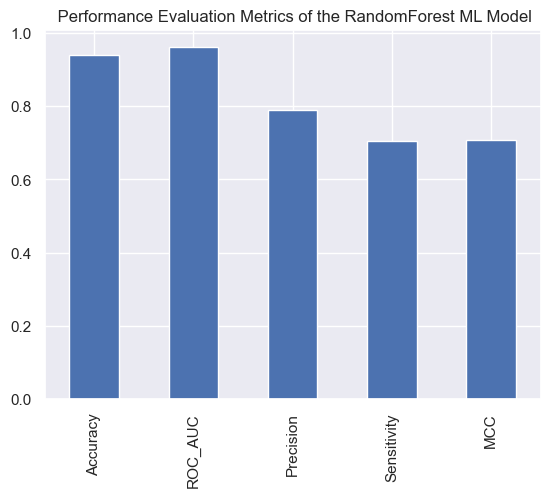

In [9]:
# Visualizing evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : oof_acc,
                           "ROC_AUC":oof_auc,
                           "Precision":oof_pre,
                           "Sensitivity": oof_rcl,
                           "MCC": oof_mcc},
                           index=[0])
eva_metrics.T.plot.bar(title =" Performance Evaluation Metrics of the RandomForest ML Model", legend=False);

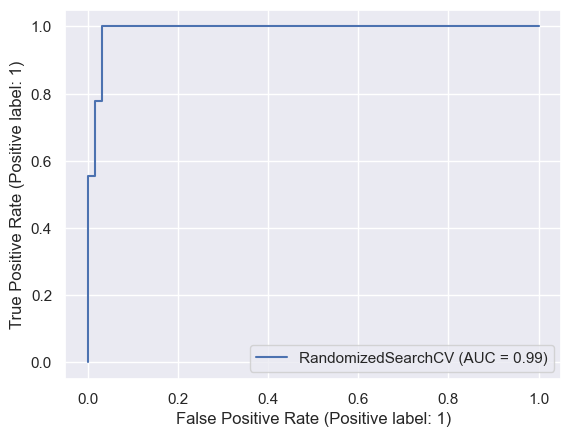

In [13]:
plot_roc_curve(cv_model_rf, X_val, y_val)

In [14]:
# Confusion Matrix For Random Forest

Text(67.25, 0.5, 'Predicted labels')

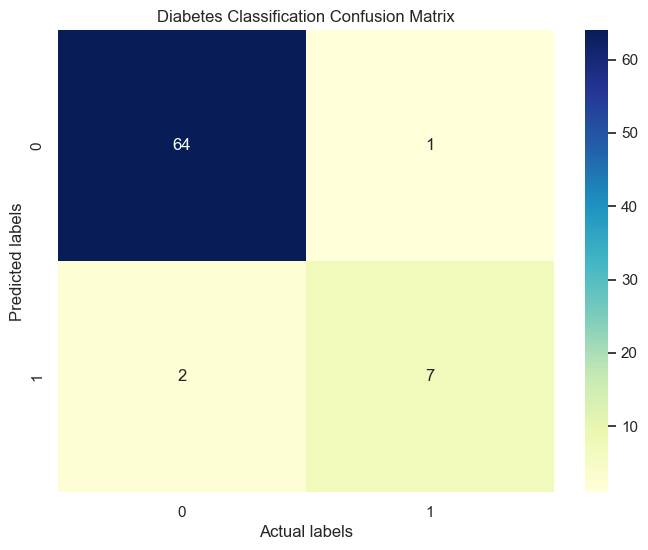

In [15]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_matrix(y_val, pred), cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Diabetes Classification Confusion Matrix')

plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")

### Gaussian Naive Bayes

In [16]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

param_grid=params_NB

In [17]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

fold = 1
aucs = []
accs = []
pres = []
rcls = []
mccs = []


# Preparing preprocessing task for the pipeline
scaler = StandardScaler()
pca = PCA(n_components= 10)
nb_model = GaussianNB()

steps =[("Scaler", scaler), ("PCA", pca), ("Naive Bayes", nb_model)]

pipeline = Pipeline(steps)

# Hyperparameter Setting

params_NB = {'Naive Bayes__var_smoothing': np.logspace(0,-9, num=100)}

cv_model_nb = GridSearchCV(pipeline, param_grid=params_NB)



In [18]:
for train_idx, val_idx in sk.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Fit Model on Train
    cv_model_nb.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    pred = cv_model_nb.predict(X_val)
    pred_prob = cv_model_nb.predict_proba(X_val)[:, 1]
    
    
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 1 ========
Our accuracy on the validation set is 0.8400 and AUC is 0.8586
======= Fold 2 ========
Our accuracy on the validation set is 0.8533 and AUC is 0.8704
======= Fold 3 ========
Our accuracy on the validation set is 0.9333 and AUC is 0.9377
======= Fold 4 ========
Our accuracy on the validation set is 0.9333 and AUC is 0.9585
======= Fold 5 ========
Our accuracy on the validation set is 0.8400 and AUC is 0.8477
======= Fold 6 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9169
======= Fold 7 ========
Our accuracy on the validation set is 0.8919 and AUC is 0.9453
======= Fold 8 ========
Our accuracy on the validation set is 0.8784 and AUC is 0.8085
======= Fold 9 ========
Our accuracy on the validation set is 0.9054 and AUC is 0.8974
======= Fold 10 ========
Our accuracy on the validation set is 0.9054 and AUC is 0.9453
Our out of fold AUC score is 0.8986
Our out of fold ACC score is 0.8901
Our out of fold Precision score is 0.5603
Our out of fold

In [19]:
# Save Random Forest Model
pickle.dump(cv_model_nb, open("cv_model_nb.pkl", "wb"))

In [21]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Scaler', 'PCA', 'Naive Bayes', 'Scaler__copy', 'Scaler__with_mean', 'Scaler__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__n_oversamples', 'PCA__power_iteration_normalizer', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'Naive Bayes__priors', 'Naive Bayes__var_smoothing'])

In [20]:
cv_model_nb.best_params_

{'Naive Bayes__var_smoothing': 0.03511191734215131}

In [6]:

# Load saved nb model
nb_model = pickle.load(open("cv_model_nb.pkl", "rb"))

cv_model_nb = nb_model

In [19]:
cv_model_nb

GridSearchCV(estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('PCA', PCA(n_components=10)),
                                       ('Naive Bayes', GaussianNB())]),
             param_grid={'Naive Bayes__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [20]:
# Visualize Results

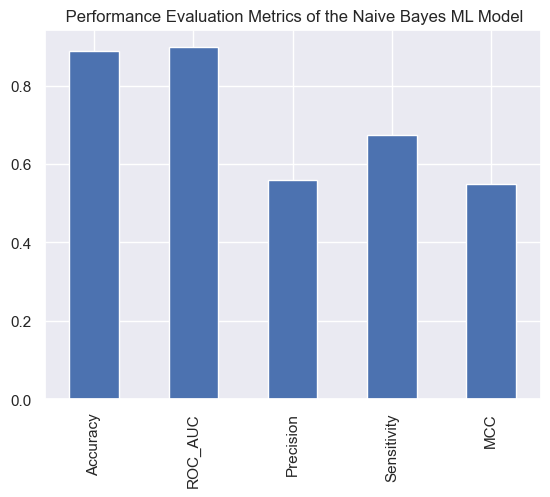

In [21]:
# Visualizing evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : oof_acc,
                           "ROC_AUC":oof_auc,
                           "Precision":oof_pre,
                           "Sensitivity": oof_rcl,
                           "MCC": oof_mcc},
                           index=[0])
eva_metrics.T.plot.bar(title =" Performance Evaluation Metrics of the Naive Bayes ML Model", legend=False);

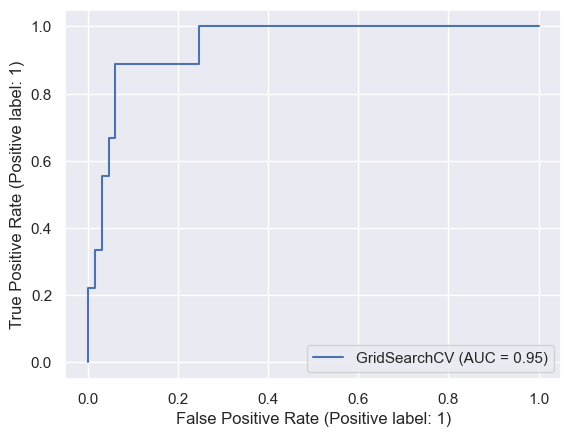

In [22]:
plot_roc_curve(cv_model_nb, X_val, y_val)

Text(67.25, 0.5, 'Predicted labels')

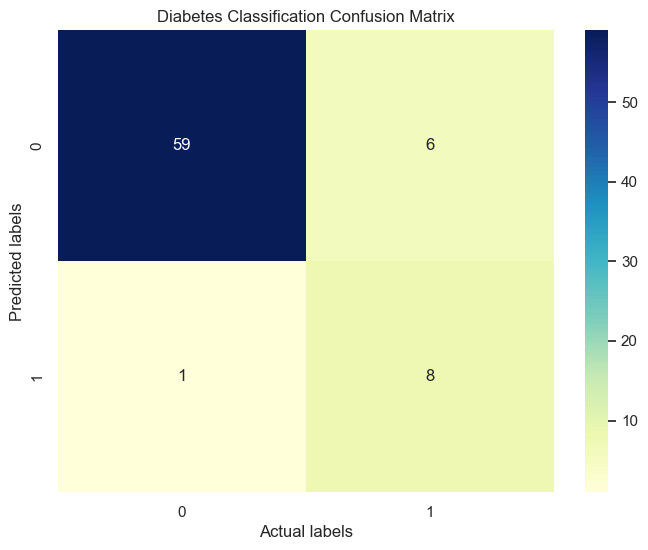

In [23]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_matrix(y_val, pred), cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Diabetes Classification Confusion Matrix')

plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")

### Logistic Regression Algorithm

In [24]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [25]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

fold = 1
aucs = []
accs = []
pres = []
rcls = []
mccs = []


# Preparing preprocessing task for the pipeline
scaler = StandardScaler()
pca = PCA(n_components= 10)
lr_model = LogisticRegression(random_state=42)

steps =[("Scaler", scaler), ("PCA", pca), ("Logistic Regression", lr_model)]

pipeline = Pipeline(steps)

# Hyperparameter Setting

params_lr = [    
    {'Logistic Regression__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'Logistic Regression__C' : np.logspace(-4, 4, 20),
    'Logistic Regression__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'Logistic Regression__max_iter' : [100, 1000,2500, 5000]
    }
]

cv_model_lr = RandomizedSearchCV(pipeline, param_distributions=params_lr)


In [26]:
for train_idx, val_idx in sk.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Fit Model on Train
    cv_model_lr.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    pred = cv_model_lr.predict(X_val)
    pred_prob = cv_model_lr.predict_proba(X_val)[:, 1]
    
    
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 1 ========
Our accuracy on the validation set is 0.8800 and AUC is 0.9360
======= Fold 2 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9545
======= Fold 3 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9848
======= Fold 4 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9615
======= Fold 5 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9508
======= Fold 6 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9646
======= Fold 7 ========
Our accuracy on the validation set is 0.9595 and AUC is 0.9932
======= Fold 8 ========
Our accuracy on the validation set is 0.8919 and AUC is 0.9231
======= Fold 9 ========
Our accuracy on the validation set is 0.9189 and AUC is 0.9641
======= Fold 10 ========
Our accuracy on the validation set is 0.9324 and AUC is 0.9692
Our out of fold AUC score is 0.9602
Our out of fold ACC score is 0.9223
Our out of fold Precision score is 0.6423
Our out of fold

In [24]:
# Save Logistic Regression Model
pickle.dump(cv_model_lr, open("cv_model_lr.pkl", "wb"))

In [27]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Scaler', 'PCA', 'Logistic Regression', 'Scaler__copy', 'Scaler__with_mean', 'Scaler__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__n_oversamples', 'PCA__power_iteration_normalizer', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'Logistic Regression__C', 'Logistic Regression__class_weight', 'Logistic Regression__dual', 'Logistic Regression__fit_intercept', 'Logistic Regression__intercept_scaling', 'Logistic Regression__l1_ratio', 'Logistic Regression__max_iter', 'Logistic Regression__multi_class', 'Logistic Regression__n_jobs', 'Logistic Regression__penalty', 'Logistic Regression__random_state', 'Logistic Regression__solver', 'Logistic Regression__tol', 'Logistic Regression__verbose', 'Logistic Regression__warm_start'])

In [25]:
cv_model_lr.best_params_

{'Logistic Regression__solver': 'saga',
 'Logistic Regression__penalty': 'none',
 'Logistic Regression__max_iter': 100,
 'Logistic Regression__C': 11.288378916846883}

In [7]:

# Load saved lr model
lr_model = pickle.load(open("cv_model_lr.pkl", "rb"))

cv_model_lr = lr_model

In [27]:
# Visualize Results

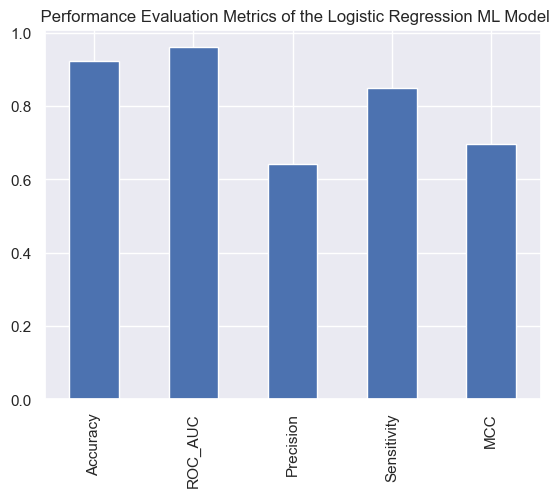

In [28]:
# Visualizing evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : oof_acc,
                           "ROC_AUC":oof_auc,
                           "Precision":oof_pre,
                           "Sensitivity": oof_rcl,
                           "MCC": oof_mcc},
                           index=[0])
eva_metrics.T.plot.bar(title =" Performance Evaluation Metrics of the Logistic Regression ML Model", legend=False);

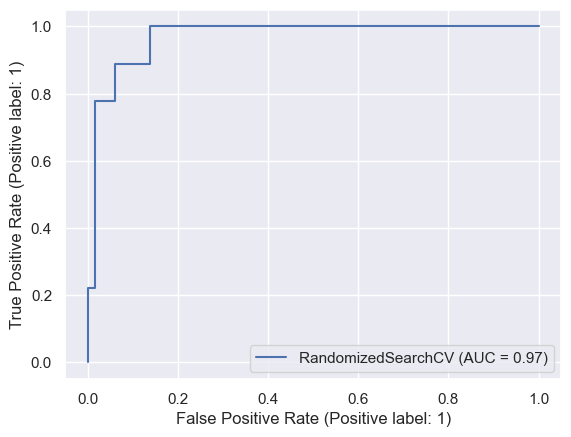

In [29]:
plot_roc_curve(cv_model_lr, X_val, y_val)

Text(67.25, 0.5, 'Predicted labels')

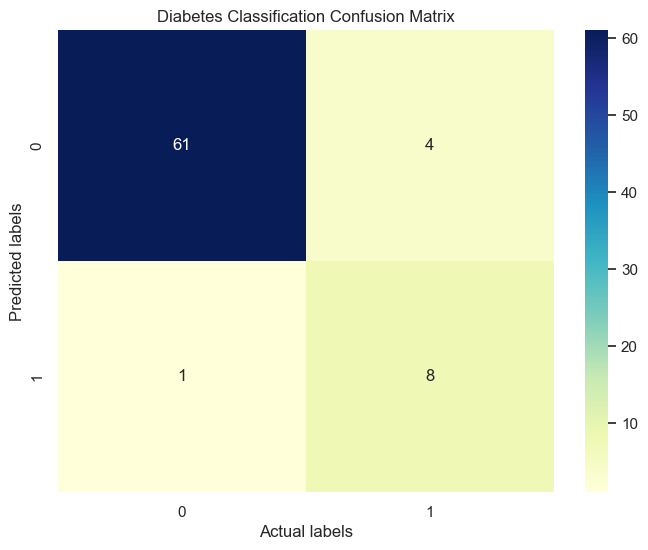

In [32]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_matrix(y_val, pred), cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Diabetes Classification Confusion Matrix')

plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")

### Support Vector Machine Algorithm

In [33]:
SVC_opt_params= { 
    'Support Vector Machine__C':            np.arange( 1, 51, 10 ),
    'Support Vector Machine__kernel':       ['rbf','sigmoid', 'poly', 'linear'],
    'Support Vector Machine__degree':       np.arange( 0, 50, 10 ),
    'Support Vector Machine__gamma':        np.arange( 0, 3.0, 0.5 ),
    }

"""   
    'Support Vector Machine__coef0':        np.arange( 0, 3.1, 0.1 )
"""

cv= RandomizedSearchCV(pipeline, param_distributions = SVC_opt_params)

In [34]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

fold = 1
aucs = []
accs = []
pres = []
rcls = []
mccs = []


# Preparing preprocessing task for the pipeline
scaler = StandardScaler()
pca = PCA(n_components= 10)
svm_model = SVC(random_state=42)

steps =[("Scaler", scaler), ("PCA", pca), ("Support Vector Machine", svm_model)]

pipeline = Pipeline(steps)

# Hyperparameter Setting
SVC_opt_params= { 
    'Support Vector Machine__C':            np.arange( 1, 11, 1 ),
    'Support Vector Machine__kernel':       ['rbf','sigmoid', 'poly', 'linear'],
    }

cv_model_svm= RandomizedSearchCV(pipeline, param_distributions = SVC_opt_params)


In [33]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Scaler', 'PCA', 'Support Vector Machine', 'Scaler__copy', 'Scaler__with_mean', 'Scaler__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__n_oversamples', 'PCA__power_iteration_normalizer', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'Support Vector Machine__C', 'Support Vector Machine__break_ties', 'Support Vector Machine__cache_size', 'Support Vector Machine__class_weight', 'Support Vector Machine__coef0', 'Support Vector Machine__decision_function_shape', 'Support Vector Machine__degree', 'Support Vector Machine__gamma', 'Support Vector Machine__kernel', 'Support Vector Machine__max_iter', 'Support Vector Machine__probability', 'Support Vector Machine__random_state', 'Support Vector Machine__shrinking', 'Support Vector Machine__tol', 'Support Vector Machine__verbose'])

In [35]:
for train_idx, val_idx in sk.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Fit Model on Train
    cv_model_svm.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    pred = cv_model_svm.predict(X_val)
    #pred_prob = cv_model_svm.predict_proba(X_val)[:, 1]
    
    
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 1 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9293
======= Fold 2 ========
Our accuracy on the validation set is 0.9733 and AUC is 0.9369
======= Fold 3 ========
Our accuracy on the validation set is 0.9733 and AUC is 0.9848
======= Fold 4 ========
Our accuracy on the validation set is 0.9733 and AUC is 0.9846
======= Fold 5 ========
Our accuracy on the validation set is 0.9467 and AUC is 0.9269
======= Fold 6 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9769
======= Fold 7 ========
Our accuracy on the validation set is 0.9595 and AUC is 0.8333
======= Fold 8 ========
Our accuracy on the validation set is 0.9189 and AUC is 0.7624
======= Fold 9 ========
Our accuracy on the validation set is 0.9730 and AUC is 0.8889
======= Fold 10 ========
Our accuracy on the validation set is 0.9730 and AUC is 0.9368
Our out of fold AUC score is 0.9161
Our out of fold ACC score is 0.9611
Our out of fold Precision score is 0.8463
Our out of fold

In [34]:
cv_model_svm.best_params_

{'Support Vector Machine__kernel': 'rbf', 'Support Vector Machine__C': 9}

In [36]:
# Save Support Vetor Machine Model
pickle.dump(cv_model_svm, open("cv_model_svm.pkl", "wb"))

In [8]:
# Load saved svm model
svm_model = pickle.load(open("cv_model_svm.pkl", "rb"))

cv_model_svm = svm_model

In [36]:
cv_model_svm

RandomizedSearchCV(estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                             ('PCA', PCA(n_components=10)),
                                             ('Support Vector Machine',
                                              SVC(random_state=42))]),
                   param_distributions={'Support Vector Machine__C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'Support Vector Machine__kernel': ['rbf',
                                                                           'sigmoid',
                                                                           'poly',
                                                                           'linear']})

In [37]:
# Visualization

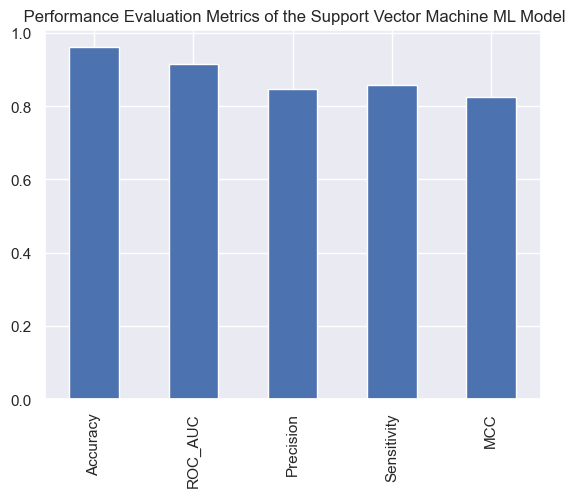

In [38]:
# Visualizing evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : oof_acc,
                           "ROC_AUC":oof_auc,
                           "Precision":oof_pre,
                           "Sensitivity": oof_rcl,
                           "MCC": oof_mcc},
                           index=[0])
eva_metrics.T.plot.bar(title =" Performance Evaluation Metrics of the Support Vector Machine ML Model", legend=False);

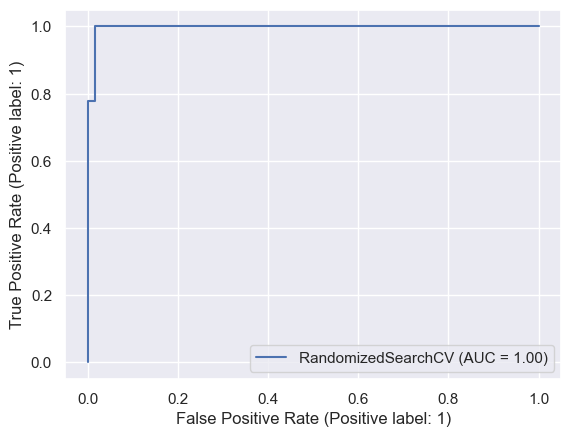

In [39]:
plot_roc_curve(cv_model_svm, X_val, y_val)

Text(67.25, 0.5, 'Predicted labels')

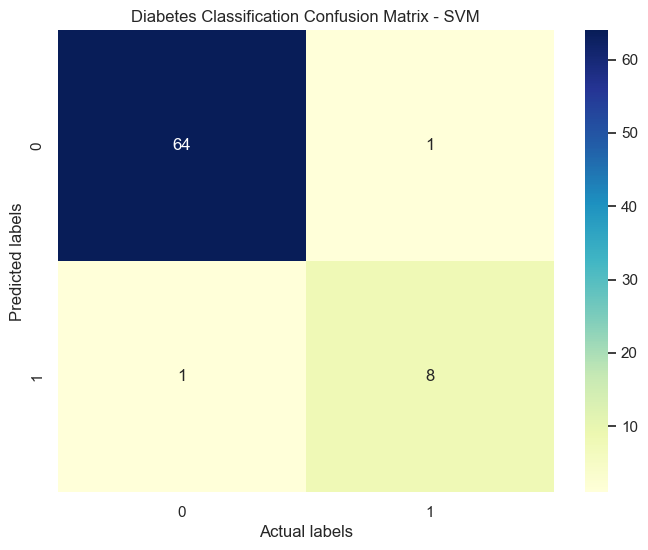

In [40]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_matrix(y_val, pred), cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Diabetes Classification Confusion Matrix - SVM')

plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")

### Decision Tree Algorithm

In [41]:
params_df = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"]
}

In [42]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

fold = 1
aucs = []
accs = []
pres = []
rcls = []
mccs = []


# Preparing preprocessing task for the pipeline
scaler = StandardScaler()
pca = PCA(n_components= 10)
dt_model = DecisionTreeClassifier(random_state=42)

steps =[("Scaler", scaler), ("PCA", pca), ("Decision Tree", dt_model)]

pipeline = Pipeline(steps)

# Hyperparameter Setting
params_dt = {
    'Decision Tree__max_depth': [2, 3, 5, 10, 20],
    'Decision Tree__min_samples_leaf': [5, 10, 20, 50, 100],
    'Decision Tree__criterion': ["gini", "entropy"],
    'Decision Tree__splitter': ["best", "random"]
}

cv_model_dt= RandomizedSearchCV(pipeline, param_distributions = params_dt)


In [28]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Scaler', 'PCA', 'Decision Tree', 'Scaler__copy', 'Scaler__with_mean', 'Scaler__with_std', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__n_oversamples', 'PCA__power_iteration_normalizer', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'Decision Tree__ccp_alpha', 'Decision Tree__class_weight', 'Decision Tree__criterion', 'Decision Tree__max_depth', 'Decision Tree__max_features', 'Decision Tree__max_leaf_nodes', 'Decision Tree__min_impurity_decrease', 'Decision Tree__min_samples_leaf', 'Decision Tree__min_samples_split', 'Decision Tree__min_weight_fraction_leaf', 'Decision Tree__random_state', 'Decision Tree__splitter'])

In [44]:
for train_idx, val_idx in sk.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Fit Model on Train
    cv_model_dt.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    pred = cv_model_dt.predict(X_val)
    pred_prob = cv_model_dt.predict_proba(X_val)[:, 1]
    
    
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 1 ========
Our accuracy on the validation set is 0.8800 and AUC is 0.8678
======= Fold 2 ========
Our accuracy on the validation set is 0.7600 and AUC is 0.7862
======= Fold 3 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.8981
======= Fold 4 ========
Our accuracy on the validation set is 0.9067 and AUC is 0.9708
======= Fold 5 ========
Our accuracy on the validation set is 0.8133 and AUC is 0.8615
======= Fold 6 ========
Our accuracy on the validation set is 0.9067 and AUC is 0.9369
======= Fold 7 ========
Our accuracy on the validation set is 0.9054 and AUC is 0.9462
======= Fold 8 ========
Our accuracy on the validation set is 0.8514 and AUC is 0.7009
======= Fold 9 ========
Our accuracy on the validation set is 0.8108 and AUC is 0.7641
======= Fold 10 ========
Our accuracy on the validation set is 0.9054 and AUC is 0.8085
Our out of fold AUC score is 0.8541
Our out of fold ACC score is 0.8660
Our out of fold Precision score is 0.4817
Our out of fold

In [30]:
# Save Decision Tree Model
pickle.dump(cv_model_dt, open("cv_model_dt.pkl", "wb"))

In [38]:
cv_model_dt.best_params_

{'Decision Tree__splitter': 'best',
 'Decision Tree__min_samples_leaf': 5,
 'Decision Tree__max_depth': 10,
 'Decision Tree__criterion': 'entropy'}

In [9]:
# Load saved dt model
dt_model = pickle.load(open("cv_model_dt.pkl", "rb"))

cv_model_dt = dt_model

In [43]:
# Visualization

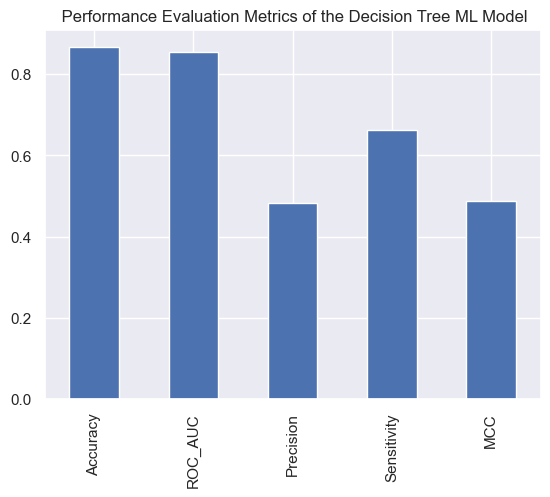

In [45]:
# Visualizing evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : oof_acc,
                           "ROC_AUC":oof_auc,
                           "Precision":oof_pre,
                           "Sensitivity": oof_rcl,
                           "MCC": oof_mcc},
                           index=[0])
eva_metrics.T.plot.bar(title =" Performance Evaluation Metrics of the Decision Tree ML Model", legend=False);

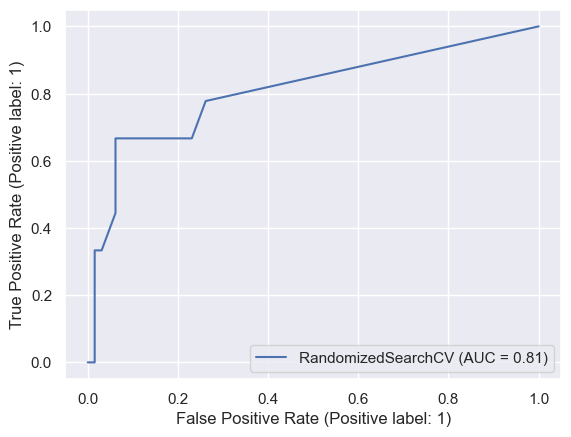

In [46]:
plot_roc_curve(cv_model_dt, X_val, y_val)

Text(67.25, 0.5, 'Predicted labels')

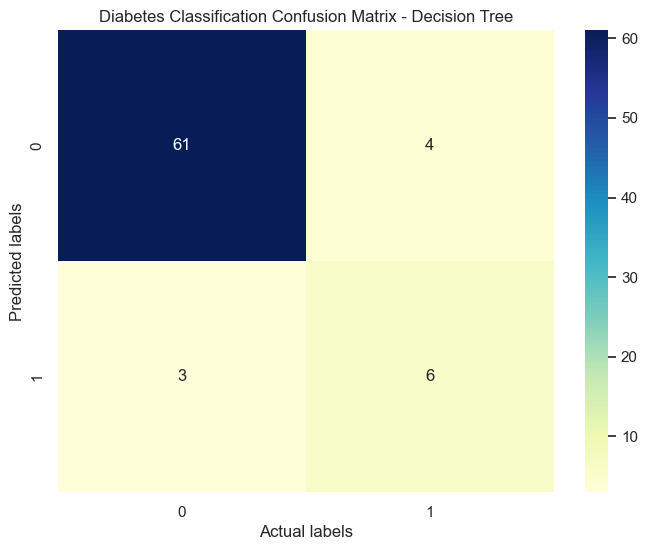

In [48]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_matrix(y_val, pred), cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Diabetes Classification Confusion Matrix - Decision Tree')

plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")

### Stacked Ensemble Method (SEM)

In [49]:

##Stacked Ensemble Method

estimator_list = [
    ("Random Forest",cv_model_rf),
    ("SVM", cv_model_svm),
    ("Naive Bayes", cv_model_nb),
    ("Decision Trees", cv_model_dt),
    ("Logistic Regression", cv_model_lr)
]


In [50]:
# Build stack model
stacked_model = StackingClassifier(
    estimators=estimator_list, final_estimator = LogisticRegression())

In [51]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

fold = 1
aucs = []
accs = []
pres = []
rcls = []
mccs = []


# Preparing preprocessing task for the pipeline
scaler = StandardScaler()
pca = PCA(n_components= 10)

#stacked_model = stacked_model

steps =[("Scaler", scaler), ("PCA", pca), ("SEM", stacked_model)]

pipeline_sem = Pipeline(steps)


In [52]:
for train_idx, val_idx in sk.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Fit Model on Train
    pipeline_sem.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    pred = pipeline_sem.predict(X_val)
    pred_prob = pipeline_sem.predict_proba(X_val)[:, 1]
    
    
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 1 ========
Our accuracy on the validation set is 0.9467 and AUC is 0.9815
======= Fold 2 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9949
======= Fold 3 ========
Our accuracy on the validation set is 0.9733 and AUC is 1.0000
======= Fold 4 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9938
======= Fold 5 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9600
======= Fold 6 ========
Our accuracy on the validation set is 1.0000 and AUC is 1.0000
======= Fold 7 ========
Our accuracy on the validation set is 0.9459 and AUC is 0.9795
======= Fold 8 ========
Our accuracy on the validation set is 0.9189 and AUC is 0.9470
======= Fold 9 ========
Our accuracy on the validation set is 0.9730 and AUC is 0.9932
======= Fold 10 ========
Our accuracy on the validation set is 0.9730 and AUC is 0.9966
Our out of fold AUC score is 0.9847
Our out of fold ACC score is 0.9571
Our out of fold Precision score is 0.8605
Our out of fold

In [23]:
#Save Decision Tree Model
pickle.dump(pipeline_sem, open("cv_model_sem.pkl", "wb"))

In [10]:
# Load saved sem model
sem_model = pickle.load(open("cv_model_sem.pkl", "rb"))

sem_model

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=10)),
                ('SEM',
                 StackingClassifier(estimators=[('Random Forest',
                                                 RandomizedSearchCV(estimator=Pipeline(steps=[('Scaler',
                                                                                               StandardScaler()),
                                                                                              ('PCA',
                                                                                               PCA(n_components=10)),
                                                                                              ('Random_forest',
                                                                                               RandomForestClassifier(random_state=42))]),
                                                                    param_distributions={'Random_forest__class_weight': ['balanced...
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                                                                          'Logistic Regression__max_iter': [100,
                                                                                                                            1000,
                                                                                                                            2500,
                                                                                                                            5000],
                                                                                          'Logistic Regression__penalty': ['l1',
                                                                                                                           'l2',
                                                                                                                           'elasticnet',
                                                                                                                           'none'],
                                                                                          'Logistic Regression__solver': ['lbfgs',
                                                                                                                          'newton-cg',
                                                                                                                          'liblinear',
                                                                                                                          'sag',
                                                                                                                          'saga']}]))],
                                    final_estimator=LogisticRegression()))])

In [54]:
pipeline_sem

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=10)),
                ('SEM',
                 StackingClassifier(estimators=[('Random Forest',
                                                 RandomizedSearchCV(estimator=Pipeline(steps=[('Scaler',
                                                                                               StandardScaler()),
                                                                                              ('PCA',
                                                                                               PCA(n_components=10)),
                                                                                              ('Random_forest',
                                                                                               RandomForestClassifier(random_state=42))]),
                                                                    param_distributions={'Random_forest__class_weight': ['balanced...
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                                                                          'Logistic Regression__max_iter': [100,
                                                                                                                            1000,
                                                                                                                            2500,
                                                                                                                            5000],
                                                                                          'Logistic Regression__penalty': ['l1',
                                                                                                                           'l2',
                                                                                                                           'elasticnet',
                                                                                                                           'none'],
                                                                                          'Logistic Regression__solver': ['lbfgs',
                                                                                                                          'newton-cg',
                                                                                                                          'liblinear',
                                                                                                                          'sag',
                                                                                                                          'saga']}]))],
                                    final_estimator=LogisticRegression()))])

In [ ]:
# Visualization

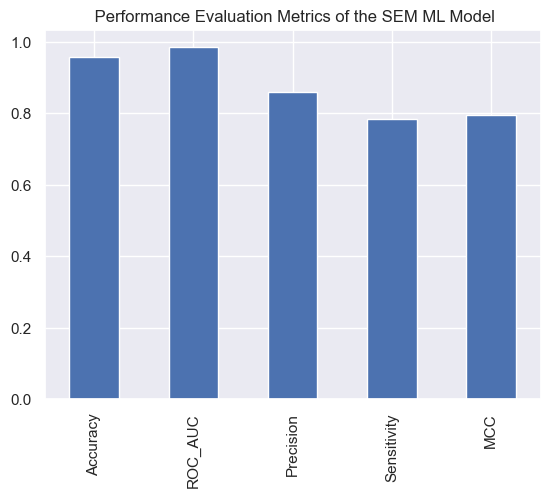

In [55]:
# Visualizing evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : oof_acc,
                           "ROC_AUC":oof_auc,
                           "Precision":oof_pre,
                           "Sensitivity": oof_rcl,
                           "MCC": oof_mcc},
                           index=[0])
eva_metrics.T.plot.bar(title =" Performance Evaluation Metrics of the SEM ML Model", legend=False);

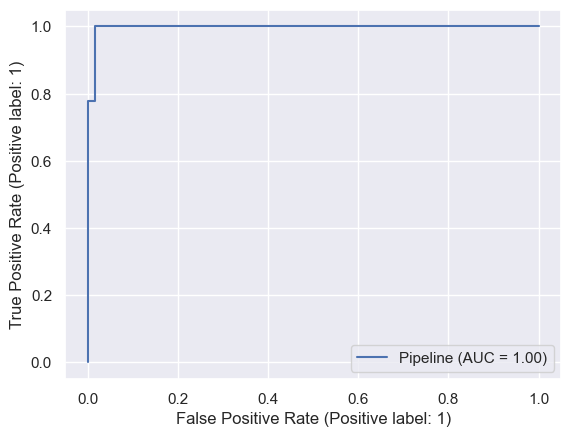

In [63]:
plot_roc_curve(pipeline_sem, X_val)

Text(67.25, 0.5, 'Predicted labels')

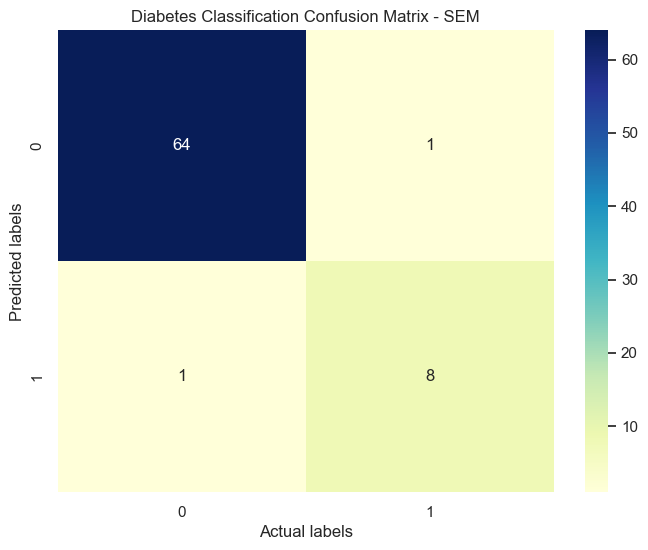

In [64]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_matrix(y_val, pred), cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Diabetes Classification Confusion Matrix - SEM')

plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")

AUC value is 0.9367521367521368


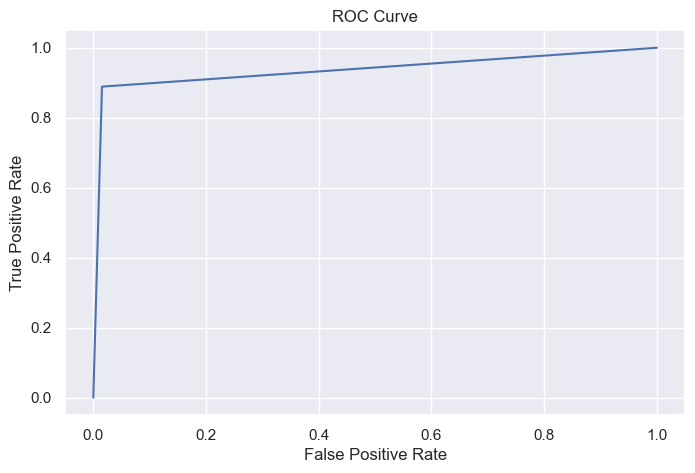

In [61]:
fpr, tpr, threshould = roc_curve(pred, y_val)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('ROC Curve', size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

### Stacked Ensemble Method 2

In [11]:

##Stacked Ensemble Method

estimator_list_2 = [
    ("Random Forest",cv_model_rf),
    ("SVM", cv_model_svm),
    ("Logistic Regression", cv_model_lr)
]


In [14]:
# Build stack model
stacked_model_2 = StackingClassifier(
    estimators=estimator_list_2, final_estimator = LogisticRegression())

In [15]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

fold = 1
aucs = []
accs = []
pres = []
rcls = []
mccs = []


# Preparing preprocessing task for the pipeline
scaler = StandardScaler()
pca = PCA(n_components= 10)

#stacked_model = stacked_model

steps =[("Scaler", scaler), ("PCA", pca), ("SEM", stacked_model_2)]

pipeline_sem = Pipeline(steps)


In [16]:
for train_idx, val_idx in sk.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Fit Model on Train
    pipeline_sem.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    pred = pipeline_sem.predict(X_val)
    pred_prob = pipeline_sem.predict_proba(X_val)[:, 1]
    
    
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 1 ========
Our accuracy on the validation set is 0.9467 and AUC is 0.9815
======= Fold 2 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9949
======= Fold 3 ========
Our accuracy on the validation set is 0.9867 and AUC is 1.0000
======= Fold 4 ========
Our accuracy on the validation set is 0.9467 and AUC is 0.9908
======= Fold 5 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9615
======= Fold 6 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9892
======= Fold 7 ========
Our accuracy on the validation set is 0.9189 and AUC is 0.9675
======= Fold 8 ========
Our accuracy on the validation set is 0.9054 and AUC is 0.9111
======= Fold 9 ========
Our accuracy on the validation set is 0.9730 and AUC is 0.9949
======= Fold 10 ========
Our accuracy on the validation set is 0.9595 and AUC is 0.9949
Our out of fold AUC score is 0.9786
Our out of fold ACC score is 0.9477
Our out of fold Precision score is 0.8113
Our out of fold

In [25]:
#Save Decision Tree Model
pickle.dump(pipeline_sem, open("cv_model_sem_2.pkl", "wb"))

In [ ]:
# Load saved sem model
sem_model_2 = pickle.load(open("cv_model_sem_2.pkl", "rb"))

sem_model_2

In [14]:
# Best Hyperparameters for Support Vector Machine, Random Forest and
# Logistic Regression Model, Naive Bayes and Decision Tree
cv_model_svm.best_params_

{'Support Vector Machine__kernel': 'rbf', 'Support Vector Machine__C': 9}

In [20]:
cv_model_rf.best_params_

{'Random_forest__n_estimators': 130,
 'Random_forest__max_features': 'log2',
 'Random_forest__max_depth': 10,
 'Random_forest__criterion': 'gini',
 'Random_forest__class_weight': 'balanced_subsample'}

In [21]:
cv_model_lr.best_params_

{'Logistic Regression__solver': 'saga',
 'Logistic Regression__penalty': 'none',
 'Logistic Regression__max_iter': 100,
 'Logistic Regression__C': 11.288378916846883}

In [12]:
cv_model_nb.best_params_

{'Naive Bayes__var_smoothing': 0.03511191734215131}

In [13]:
cv_model_dt.best_params_

{'Decision Tree__splitter': 'best',
 'Decision Tree__min_samples_leaf': 5,
 'Decision Tree__max_depth': 10,
 'Decision Tree__criterion': 'entropy'}

### Stacked Ensemble Method 3

In [27]:
##Stacked Ensemble Method Top 2 Algorithms with the best results

estimator_list_3 = [
    ("Random Forest",cv_model_rf),
    ("SVM", cv_model_svm)
]

In [29]:
# Build stack model
stacked_model_3 = StackingClassifier(
    estimators=estimator_list_3, final_estimator = LogisticRegression())

In [30]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=529)

fold = 1
aucs = []
accs = []
pres = []
rcls = []
mccs = []


# Preparing preprocessing task for the pipeline
scaler = StandardScaler()
pca = PCA(n_components= 10)

#stacked_model = stacked_model

steps =[("Scaler", scaler), ("PCA", pca), ("SEM", stacked_model_3)]

pipeline_sem = Pipeline(steps)


In [31]:
for train_idx, val_idx in sk.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]
    
    
    # Class Balancing
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled =smote.fit_resample(X_tr, y_tr)

    # Fit Model on Train
    pipeline_sem.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    pred = pipeline_sem.predict(X_val)
    pred_prob = pipeline_sem.predict_proba(X_val)[:, 1]
    
    
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob)
    pre_score = precision_score(y_val, pred)
    rcl_score = recall_score(y_val, pred)
    mcc_score =  matthews_corrcoef(y_val, pred)
    print(f"======= Fold {fold} ========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    aucs.append(auc_score)
    accs.append(acc_score)
    pres.append(pre_score)
    rcls.append(rcl_score)
    mccs.append(mcc_score)
    
    
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
    
oof_acc = np.mean(accs)
print(f'Our out of fold ACC score is {oof_acc:0.4f}')

oof_pre = np.mean(pres)
print(f'Our out of fold Precision score is {oof_pre:0.4f}')
    
oof_rcl = np.mean(rcls)
print(f'Our out of fold Sensitivity score is {oof_rcl:0.4f}')

oof_mcc = np.mean(mccs)
print(f'Our out of fold MCC score is {oof_mcc:0.4f}')
    

======= Fold 1 ========
Our accuracy on the validation set is 0.9333 and AUC is 0.9714
======= Fold 2 ========
Our accuracy on the validation set is 0.9333 and AUC is 0.9832
======= Fold 3 ========
Our accuracy on the validation set is 0.9733 and AUC is 0.9966
======= Fold 4 ========
Our accuracy on the validation set is 0.9600 and AUC is 0.9923
======= Fold 5 ========
Our accuracy on the validation set is 0.9200 and AUC is 0.9600
======= Fold 6 ========
Our accuracy on the validation set is 0.9867 and AUC is 1.0000
======= Fold 7 ========
Our accuracy on the validation set is 0.9324 and AUC is 0.9880
======= Fold 8 ========
Our accuracy on the validation set is 0.9054 and AUC is 0.8957
======= Fold 9 ========
Our accuracy on the validation set is 0.9595 and AUC is 0.9863
======= Fold 10 ========
Our accuracy on the validation set is 0.9595 and AUC is 0.9949
Our out of fold AUC score is 0.9768
Our out of fold ACC score is 0.9463
Our out of fold Precision score is 0.7995
Our out of fold

In [32]:
#Save Decision Tree Model
pickle.dump(pipeline_sem, open("cv_model_sem_3.pkl", "wb"))